# Classification and Regression

### Dataset

As an example dataset, we will use the [pima indian diabetes dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.names), which records measurements about several hundred patients and an indication of whether or not they tested positive for diabetes (the class label).  The classification is therefore to predict whether a patient will test positive for diabetes, based on the various measurements.


We first load in the dataset and randomly divide it into training and test sets.   We also normalise the data.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

##load in the data
pima=pd.read_csv('pima-indians-diabetes.csv',encoding = 'ISO-8859-1')

##get just the features
data=pima[['numpregnant','plasma','blood pressure','sf-thickness','serum-insulin','BMI','pedigree-function','age']].astype(float)


##get just the class labels
classlabel=pima['has_diabetes']

##randomly select 66% of the instances to be training and the rest to be testing
X_train, X_test, y_train, y_test = train_test_split(data,classlabel, train_size=0.66, test_size=0.34, random_state=42)

#normalise the data to have 0 mean and unit variance using the library functions.  This will help for later
#computation of distances between instances
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)




We then fit a K-nearest neighbor classifier with K=5.
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [50]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

We then make predictions - for each of the test instances, we predict the class label using k-NN.   We compare our prediction with the actual class label and report the overall accuracy.

In [51]:
y_pred=knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7061068702290076


## Question 1
Draw a scatter plot that shows varying k versus the prediction accuracy achieved by k-NN on the test set.  Based on your graph, what is the optimal k to use for this dataset?   How much better is this compared to a classifier that always make a prediction of 0 (not tested positive for diabetes)?

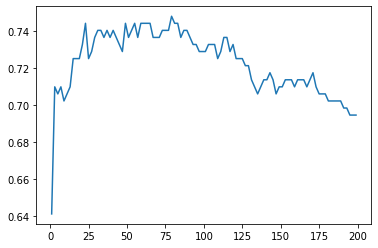

In [52]:
###Question 1 answer

### Interesting question : incease k to be X_train.shape[0], what does that tell you?

import numpy
ks = range(1,200,2)
accu_list=[]
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) 
    y_pred=knn.predict(X_test)
    accu_list.append(accuracy_score(y_test, y_pred))
    

plt.plot(ks,accu_list)
plt.show()


We now fit a [decision tree classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).  To make the tree simple and easy to visualise, we enforce a maximum depth of 3.   

In [53]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy",random_state=1, max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

Again we make predictions - for each of the test instances, we predict the class label.   We compare our prediction with the real class label and report the overall accuracy.

In [54]:
y_pred=dt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7175572519083969


## Question 2
Draw a graph of decision tree classification accuracy as the size of the training set is varied between 10% and 90%.   For what training size is it the most accurate?  Why do you think this is the case?

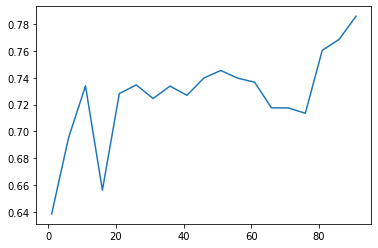

In [55]:
##Question 2 answer

splits = range(1,95,5)
accu_list=[]
for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(data,classlabel,train_size=split/100,test_size=1-split/100,random_state=42)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)
    dt.fit(X_train, y_train)
    y_pred=dt.predict(X_test)
    accu_list.append(accuracy_score(y_test, y_pred))

plt.plot(splits,accu_list)
plt.show()


### Decision tree visualisation

The decision tree learned using 66% of the data is shown below.  The split condition is shown at the top of each node.  The true branch for the condition goes to the left and the false branch to the right.   The bottom line of each node shows the frequency of [negative, positive instances] in the node;

![Decision tree](mytree.png)

(For information only) The code to generate the tree visualisation is shown below.  It is commented out, since it is tricky to get the graphviz library installed and this is not currently working on the University lab machines.   If you are using a Mac on your home macine - one can use the "brew" package manager and then do "brew install graphviz".

In [56]:
#from sklearn.tree import export_graphviz
#import graphviz


#export_graphviz(dt, out_file="mytree.dot",feature_names = data.columns,filled=True,rounded=True)
#with open("./mytree.dot") as f:
#    dot_graph = f.read()
    
#graphviz.Source(dot_graph)


## Linear Regression
We will use a dataset in sklearn to practice linear regression.
The dataset is Boston house prices that comes with sklearn. Please see the description below:

In [57]:
from sklearn import datasets 
import pandas as pd

data = datasets.load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [58]:
# X: features 
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [59]:
# y: target
target = pd.DataFrame(data.target, columns=["MEDV"])
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Example lm 
The following fits a linear regression model using the two variables **RM** (average number of rooms per dwelling) and **LSTAT** (%lower status of the population) to predict **MEDV** (Median value of owner-occupied homes in \$1000's). 



In [60]:
##  Example
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['RM', 'LSTAT']]
y = target['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# partial code here...
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_test_predictions = lm.predict(X_test)
print('actual MEDV values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted MEDV values of the first 5 test data:')
print(y_test_predictions[0:5])
print('')

# coefficients

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))



actual MEDV values of the first 5 test data:
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64

predicted MEDV values of the first 5 test data:
[25.50510964 30.8592405  17.42725985 25.81325491 19.64929972]

Coefficients:  [ 5.46509877 -0.63249856]

Intercept:  -3.841177079004847

Coefficient of determination (test): 0.57
Coefficient of determination (training): 0.65


## Question 3

Write out the fitted linear model in Example 1 and Interpret the results

In [61]:

## Answer to Question 3

## 
#MEDV_h = -3.84 + 5.47*RM -0.63*LSTAT

#the variations in RM and LSTAT can explain 57% of the MEDV values in the test set
#the variations in RM and LSTAT can explain 65% of the MEDV values in the training set



## Question 4
Plot the residuals for the test data as well as the training data of the model in Example 1

Include legends in the scatter plot; include the Coefficient of Determination for each legend.

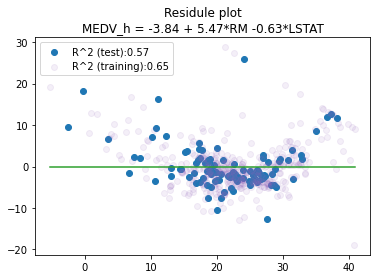

In [62]:
## Answer to Question 5
import matplotlib.pyplot as plt
# Plot residules

m = 'MEDV_h = -3.84 + 5.47*RM -0.63*LSTAT'
y_test_h = lm.predict(X_test)
y_train_h = lm.predict(X_train)

residual_train = [y - yh for y, yh in zip(y_train, y_train_h)]
residual_test = [y - yh for y, yh in zip(y_test, y_test_h)]

plt.scatter(y_test_h, residual_test, color='C0', label = 'R^2 (test):{0:.2f}'.format(r2_test))
plt.scatter(y_train_h, residual_train, color='C4', alpha = 0.1, label = 'R^2 (training):{0:.2f}'.format(r2_train))
plt.plot([min(y_train_h), max(y_train_h)], [0,0], color= 'C2')
plt.legend()
plt.title("Residule plot\n{}".format(m))
plt.show()



## Question 5 - Try outside the labs

Fit another linear model using all 13 variables to predict **MEDV** (Median value of owner-occupied homes in \$1000's). 

Compare the results with those of the model in Question 1

In [63]:
## Answer to Question 5


X = df
y = target['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

# coefficients

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))




Coefficients:  [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]

Intercept:  30.246750993923925

Coefficient of determination (test): 0.67
Coefficient of determination (training): 0.75


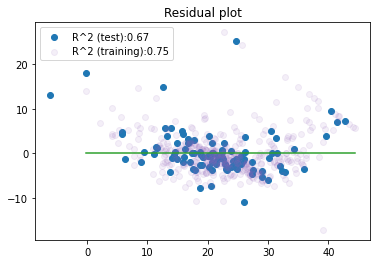

In [64]:
# Answers to Question 5 cont.
y_test_predictions = lm.predict(X_test)
y_train_predictions = lm.predict(X_train)

residual_train = [y - yh for y, yh in zip(y_train, y_train_predictions)]
residual_test = [y - yh for y, yh in zip(y_test, y_test_predictions)]

plt.scatter(y_test_predictions, residual_test, color='C0', label = 'R^2 (test):{0:.2f}'.format(r2_test))
plt.scatter(y_train_predictions, residual_train, color='C4', alpha = 0.1, label = 'R^2 (training):{0:.2f}'.format(r2_train))
plt.plot([min(y_train_predictions), max(y_train_predictions)], [0,0], color= 'C2')
plt.legend()
plt.title("Residual plot")
plt.show()

In [65]:
# Answers to Question 5 cont. 
# the 2nd model using all variables can explain more variance in MEDV.   From 57% to 67% Variance.
# Note that this is the tendency of linear models: the more the variables, the higher the value of R^2 
# the residuals do not appear random but is reasonable except that highrt MEDV tends to be under valued by the model

# note** that test data performance is more interesting as it indicates if the model is generalizable